# 16 PDE continued. Diffusion, Wave and Schroedinger eqns. Solution by the Fourier method. Transient grating.

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import quad,odeint
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

## 16.1 Diffusion across an interface and from a point

Imagine that a very long, narrow tube is half filled with a dye solution and the other half contains pure solvent each half being separated by a partition. When partition is carefully removed, diffusion from either half into the other begins. The tube is so long ($x \to \infty$) that its ends do not affect the behaviour on an experimental time scale. Immediately on opening the partition the concentration at the interface is $c(x)= c_0$ for $x \ge 0$ and $c(x) = 0$ for $x\lt 0$ both conditions apply at $t = 0$. This initial condition is quite specific, and practical, but instead of keeping a constant value $c_0$ when $x \ge 0$ and $t = 0$ the initial concentration can in general be a function of position, $f(x)$ which may range over the whole range of $x$.

To obtain a solution equation (52); 

$$\displaystyle \frac{\partial^2c_x}{\partial x^2}=-c_xk^2$$

is solved in a general way using exponentials as

$$\displaystyle c_x=\alpha_ke^{ikx}+\beta_ke^{-ikx} \tag{57}$$

where $\alpha_k$ and $\beta_k$ are constants determined by the initial and boundary conditions. This solution may generally also be taken as

$$\displaystyle c_x=b_ke^{-ikx}$$

if $k$ is allowed to be positive or negative, the general solution can be written as the product of the time and spatial solutions and integrated,

$$\displaystyle c=\int_{-\infty}^\infty b_ke^{-Dk^2t}e^{-ikx}dk \tag{58} $$ 

The change into an integral, compared with the sum previously used (eqn. 55) is made because it is assumed that so many terms are needed in the summation it is equivalent to an integral. Using the initial condition that at $t$ = 0 the concentration is $f(x)$, equation (58) produces

$$\displaystyle f(x)=\int_{-\infty}^\infty b_ke^{-ikx}dk$$

and the constants $b_k$ are found with the Fourier transform 

$$\displaystyle b_k=\frac{1}{2\pi}\int_{-\infty}^\infty f(s)e^{iks}ds$$

where $s$ is the integration variable. The complete solution is 

$$\displaystyle c=\frac{1}{2\pi}\int_{-\infty}^\infty \int_{-\infty}^\infty e^{-Dk^2t}e^{-ik(s-x)}dsdk$$

Solving the integral in $k$, keeping $t$ constant, gives the result for the concentration of the dye at position $x$ and time $t$ which is 

$$\displaystyle c(x,t)=\frac{1}{\sqrt{4\pi Dt}}\int_{-\infty}^\infty f(s)e^{-(s-x)^2/4DT}ds  \qquad\tag{59}$$

where $f(s)$ is the initial concentration profile. At zero time, this equation reduces to $f(x)$, the initial profile.

We started with a step function in concentration as the initial condition. To use this means that $f(x) = c_0$ when $x \ge$ 0 and zero otherwise, and the last equation is changed by replacing $f(s)$ by $c_0$ and is

$$\displaystyle c(x,t)=\frac{c_0}{\sqrt{4\pi Dt}}\int_{-\infty}^\infty e^{-(s-x)^2/4Dt}ds  \qquad\tag{60}$$

because the function $f(x)$ is zero at $x \lt 0$ but no other conditions apply when $t \gt 0$. This integral cannot be evaluated in terms of a finite number of functions and must be calculated numerically as the _error function_. The error function is defined as

$$erf(x)=\frac{2}{\sqrt{\pi}}\int_0^x e^{-s^2}ds$$

and its value ranges from $0 \to 1$. It is also the area under fractions the normalised Gaussian or error curve. It is convenient to define also the complementary error function,

$$\displaystyle erfc(x)=1-erf(x) = \frac{2}{\sqrt{\pi}}\int_x^\infty e^{-s^2}ds$$

which with a transformation of variables has the form of our result. Notice that $x$ appears as the argument of the function and as a limit in the integration. Letting $\displaystyle z=(s-x)/\sqrt{4Dt}$ then $\displaystyle dz=ds/\sqrt{4Dt}$ and 

$$\displaystyle c(x,t)=\frac{c_0}{\sqrt{4\pi Dt}} \int_{s=0}^\infty e^{-(s-x)^2/4Dt}ds \\
=\frac{c_0}{\sqrt{\pi} } \int_{-x/\sqrt{4Dt} }^\infty e^{-z^2}dz \\
=\frac{c_0}{2}erfc\left( -\frac{x}{\sqrt{4Dt} } \right)$$

Some concentration profiles are shown in Fig. 27 at different values of the product $\displaystyle \sqrt{4Dt)}$, which has units of distance. The mean or average distance diffused in one dimension in time $t$ is $\sqrt{2Dt}$. A typical diffusion coefficient for a small molecule in a normal solvent is $\approx 10^{-9}\,\mathrm{ m^2\, s^{-1}}$; if the mean distance diffused is a micron, i.e. $\sqrt{4Dt} = 10^{-6}$ m then the time taken is  $t \approx 0.5\cdot 10^{-3}$ s or half a millisecond. Proteins, typically, have diffusion coefficients $10$ to $100$ times smaller  say $10^{-11}\,\mathrm{ m^2\, s^{-1}}$ and take correspondingly longer to diffuse. Diffusion is a very slow process indeed. In 3D the mean distance diffused is not much greater and is $\sqrt{6Dt}$.

![Drawing](diffeqn-fig27.png)

Fig. 27 Diffusion after a step change in concentration. The initial concentration is in the right hand portion of the plot and is shaded. The concentration vs. distance is shown at the times given assuming a diffusion coefficient similar to that of lysozyme, $D$ = 11$\cdot$ 10<sup>-2</sup> nm<sup>2</sup>ns<sup>-1</sup>. The black dots show the average distance diffused for each time except for the smallest.

____

If the 'source term' $f(x)$ is a delta function $\delta (x)$, then all the material is piled up at $x = 0$ in the tube and the integral reduces to 

$$\displaystyle c(x,t)=\frac{1}{\sqrt{4\pi Dt}} \int_{-\infty}^\infty \delta(s)e^{-(s-x)^2/4Dt}ds=\frac{1}{\sqrt{4\pi Dt}}e^{-x^2/4Dt}$$

because $\delta(0) = 1$ and is otherwise zero. This function is a Gaussian or bell-shaped curve (see Chapter 12.3.3.) as material spreads out from the initial point on the line, rather as illustrated in fig 25. 

The general solution (59) can now be thought of as the convolution of a function $f(x)$ with a impulse $\delta$ function in much the same way as described in Chapter 9.7 where fluorescence, equivalent to $f(x)$, is stimulated by a laser pulse which is equivalent to the exponential term in (59).

One important application of equations similar to, but more complex than those described here is in the technique known as FRAP, which stands for fluorescence recovery after photo-bleaching. In this technique, a dye molecule is introduced into a biological membrane and then an intense laser is used to bleach the dye rapidly in the small circular spot of the focused laser. A second weaker laser stimulates the dye's fluorescence and the intensity of this is measured as the dye molecules diffuse into the bleached area. The rate at which the fluorescence recovers can be used to determine the diffusion coefficient of the dye molecules or proteins to which the dye may be attached. Should the protein contains an intrinsic chromophore, as does the green fluorescent protein (GFP), this can be used directly.


## 16.2 Asymmetric boundary conditions: reaction at a plane

In some problems, asymmetric boundary conditions apply. One such case is a (semi) infinite tube that is closed at one end and filled with a solution at a concentration of $c_0$. Diffusion is caused by the fast removal of material at the closed end, for instance by an electrode reaction that causes precipitation, see Fig. 28,28a. The concentration at $t$ and $x$ is found using the initial conditions

$$\displaystyle t = 0,\quad x \gt 0, \quad c = c_0$$

which means that initially the concentration is $c_0$ everywhere, and the boundary conditions are

$$t=0,\quad x\to \infty, \quad c=c_0 \qquad \text{ and } \qquad t \gt 0, \quad x=0, \quad c=0$$

Starting with the diffusion equation 

$$\displaystyle \frac{\partial c}{\partial t}=D\frac{\partial^2 c}{\partial x^2}$$

the variables are separated and the general solution obtained as was equation (57),

$$\displaystyle c(x,t)=\int_{-\infty}^{\infty} \alpha_ke^{-Dk^2t}e^{-ikx}+\beta+ke^{-Dk^2t}e^{ikx}dk$$

![Drawing](diffeqn-fig28a.png)

fig 28. Schematic of transient molecular concentration caused by precipitation in a tube.
_____

The general solution has this form because there are both initial and boundary conditions to satisfy. The initial condition is that at $t = 0$ the concentration is $c_0$ when $x \gt 0$ and this gives 

$$\displaystyle c_0=\int_{-\infty}^\infty \alpha e^{-ikx}+\beta_k e^{ikx}dk$$

The boundary condition, $c = 0$ at all times at _x_ = 0 is used to find the constants $\alpha$ and $\beta$ . These conditions produce 

$$\displaystyle \int_{-\infty}^\infty \alpha_ke^{-Dk^2t}+\beta_k e^{-Dk^2t}dk=0$$

and because $t$ is a constant in this expression, the exponentials cancel out. It then follows that $\alpha_k=-\beta_k$ and therefore

$$\displaystyle  c_0=\alpha_k\int_{-\infty}^\infty e^{-ikx}- e^{ikx}dk$$

The constants $\alpha_k$ can be found by Fourier transforming this equation to give

$$\displaystyle \alpha_k=\frac{c_0}{2\pi}\int_{-\infty}^\infty e^{-ikx}- e^{ikx}dx$$

Replacing $\alpha_k$ into the general solution and changing the (dummy) integration variable in distance from $x$ to $s$ for clarity gives

$$\displaystyle c(x,t)=\frac{c_0}{2\pi}\int_{0}^\infty \int_{-\infty}^\infty e^{-Dk^2t}\left(e^{-ik(s+x)}-e^{ik(s-x)}\right) dkds$$

This complicated integration produces the result

$$\displaystyle \frac{c}{c_0}=\text{erf}\left(\frac{x}{\sqrt{4Dt}}  \right) $$

The concentration $c$ vs $x$ is plotted in Fig. 28 at several times with $D = 10^{-9}\,\mathrm{ m^2\, s^{-1}}$ and as $c$ vs. $t$ at several distances. The flux, which is the concentration gradient at any point $x$ at time $t$, is 

$$\displaystyle \frac{\partial c}{\partial x}=\frac{c_0}{\sqrt{\pi Dt}}e^{-x^2/(4Dt)}$$

and this will tend to zero at $t \to \infty$.

![Drawing](diffeqn-fig28.png)

Fig. 28a Diffusion profiles where the concentration is zero at $x = 0$, such as may pertain on an electrode. Left: Concentration vs distance at the different times shown (in seconds). Right: Concentration vs. time at different distances (in metres). Note the logarithmic time scale. The diffusion coefficient used is $D = 10^{-9}\,\mathrm{ m^2\, s^{-1}}$.
_____

Diffusion to a plane can occur in an electrochemical cell. Initially, suppose that the concentration of oxidant $O_X$ is $c_0$ everywhere, and reductant $R_d$ is zero. The potential is then suddenly changed and the reaction starts. The oxidant begins to be reduced at the electrode. The concentration vs. distance is shown in Fig. 28 (left) and as time increases the amount of oxidant decreases away from the electrode. For example, after $5000$ s it is only about $40$% of its initial value, $2$ mm from the electrode. The reductant concentration shows the opposite trend since at all times oxidant + reductant = $c_0$. This argument assumes that the oxidant and reductant have the same diffusion coefficient. If the reaction $O_X + ne \leftrightharpoons R_d$ is reversible, then Nernst's equation applies at the electrode surface and is

$$\displaystyle E=E^{\mathrm{O}} -\frac{RT}{nF}\ln\left(\frac{R_d}{O_X}  \right) $$

where $F$ is the Faraday constant and $n$ the number of electrons transferred in the reaction. For different values of $\Delta E = E - E^O$ the ratio $s = O_X/R_d$ can be plotted vs. distance from the electrodes. The expression 

$$\displaystyle f_R = (1 - c(x, t))/(1 + s)$$

plots the fraction as reductant and 

$$\displaystyle f_{O_X} = (s + c(x, t))/(1 + s)$$

the fraction oxidant, their sum being one. At oxidative, or positive, potentials the ratio $O_X/R_d$ is large, and the electrode remains almost in equilibrium with the $O_X$ concentration, being almost $c_0$. If the potential is negative, $O_X/R_d \lt 1$, and almost all of the oxidant in contact with the electrode reacts, eventually the region of reduced material expands away from the electrode, Fig. 29. The current measured in the electrochemical cell is initially large because the slope of concentration with distance is large, this is the flux, and the current is proportional to the flux. At longer times, the slope is smaller at the electrode, hence the flux is reduced and so is the current.

![Drawing](diffeqn-fig29.png)

Fig. 29 Left: Profile of fractional oxidant (solid line) and reductant (dashed) after $500$ seconds vs. distance (m) away from an electrode at different ratios of $s = O_X/R_d$, hence different potentials. The potentials are $\Delta E = 0$ mV, $s = 1,\, \Delta E = 59.5$ mV, $s = 10$, and $\Delta E = -41.6$ mV, $s = 1/5$, for $n = 1$ and at $300$ K. At longer times, the curves reach either zero or $c_0$ as $x$ increases. Right. The flux $\partial c/\partial x$ is shown at different $x$ (metres) vs. time (s) and shows how the current in a cell rapidly increases to some large value before slowly fading away.

## 16.3 Diffusion into or out of a sphere

When a substance diffuses into or out of a uniform sphere, the angular coordinates can normally be ignored as diffusion can occur equally well from any place on the sphere's surface. Only the radial coordinate is important and then the diffusion equation is

$$\displaystyle \frac{\partial c }{\partial t}=D\left( \frac{\partial^2 c}{\partial r^2}+\frac{2}{r}\frac{\partial c}{\partial r} \right)$$

where $c$ is concentration and $r$ is the radial distance from the centre. Sometimes this equation is written as 

$$\displaystyle \frac{\partial c }{\partial t} =\frac{1}{r^2}\frac{\partial}{\partial r}\left( Dr^2\frac{2}{r}\frac{\partial c}{\partial r} \right)$$

The equation appears to be one of great complexity but can be solved with the substitution u = cr, which produces the familiar diffusion equation

$$\displaystyle \frac{\partial u}{\partial t}=D\frac{\partial^2 u}{\partial r^2} $$

which is solved by separating variables and applying the boundary and initial conditions in the normal way. If the sphere has a radius $R$, then $0 \lt r \le R$, and we will assume that the concentration at the sphere’s surface is always held constant at $c_s$. The boundary conditions are

$$\displaystyle  t \gt 0,\quad  u=0 \;\mathrm{at} \; r=0, \; \mathrm{and} \;  u=Rc_s \;  \mathrm{at}\; r=R $$

and the initial condition is $t = 0,\, u = rf(r)$, where $f(r)$ is a function describing the initial concentration profile inside the sphere. Often this is taken to be constant. This problem is now very similar to that of equation (54), but the boundary conditions are slightly different, one condition is that the concentration is zero the other that it is a constant. It is these conditions that produce a very complicated solution that is the sum of the product of exponential and sine terms. The result is given by Crank (1979) and Carslaw & Jaeger (1959), the latter also giving a detailed derivation.

## 16.4 Time-dependent Schroedinger equation

The time-dependent Schroedinger equation is a partial differential equation that can be solved by separating the variables. The equation is

$$\displaystyle -\frac{\hbar^2}{2m}\frac{\partial \psi}{\partial x^2} + V(x)\psi=i\hbar\frac{\partial \phi}{\partial t} \tag{61}$$

and the wavefunction is a function of both time $t$ and position $x$. As an example, suppose that a particle has kinetic energy $E$ but is free of any electric, magnetic, or gravitational fields; therefore $V(x) = 0$. There is no expression in both $x$ and $t$, so separation of the wavefunction into the product $\displaystyle \psi(x, t) = \varphi(x)u(t)$ is permitted and this allows two differential equations to be formed by substituting into
equation (61). This gives

$$\displaystyle -\frac{\hbar^2}{2m}\frac{1}{\varphi}\frac{\partial \varphi}{\partial x^2} =i\hbar\frac{\partial \phi}{\partial t} $$

and both terms must be equal to the same constant. The left-hand side of this equation is the Hamiltonian operator for the kinetic energy only, as $V$ = 0, and this is equal the energy $E = \hbar\omega$ . The energy equation becomes

$$\displaystyle \frac{\partial^2 \varphi}{\partial x^2}+\frac{2m\omega}{\hbar}\varphi=0, \quad \text{or} \quad \frac{\partial^2 \varphi}{\partial x^2}+k^2\varphi=0$$

where $k$ is a positive constant $\displaystyle k^2=\frac{2m\omega}{\hbar}$ and the solution to this equation is the standard result,

$$\varphi = Ae^{ikx}+Be^{-ikx}$$

where $A$ and $B$ are constants depending on the initial or boundary conditions.

The time-dependent part is solved with 

$$\displaystyle \frac{i\hbar}{u}\frac{\partial u}{\partial t}=\hbar\omega\quad\text{ therefore }\quad u(t) = e^{-i\omega t}$$

The constants of integration need not be added here because these have been included in $\varphi$. The complete wavefunction is therefore 

$$\displaystyle \psi = Ae^{i(kx−ωt)} + Be^{−i(kx+ωt)}$$ 

which is the equation of two plane waves travelling in opposite directions. The wave’s phase velocity is $v = \omega/k$. The probability of being position $x$ is

$$\displaystyle \psi^*\psi = |A|^2 + |B|^2 + AB^*e^{2ikx} + BA^*e^{−2ikx}$$

which demonstrates that the particle shows interference and is thus localized periodically. If the particle does not have any boundary condition imposed on it either $A$ or $B$ be can arbitrarily set to zero and then the particle travels either to the right or left and the wavefunction is 

$$\displaystyle \psi = Ce^{i(kx−ωt)}$$

where $\displaystyle \psi^*\psi = |C|^2$ and $\sqrt{C}$ is thus the normalization.

The particle’s energy is $E = \hbar\omega$ or $\displaystyle E = k^2\frac{\hbar^2}{2m}$, because momentum is $p = k\hbar $ and we have defined $\displaystyle k^2 = \frac{2m\omega}{\hbar} $. 

The classical velocity of the particle is $v = p/m$ or $v = k\hbar/m $ and this is identical to the group velocity, $v_g = d\omega/dk$. The phase velocity is, by definition, $v_p = \omega/k$, and this velocity is also $E/p$ because kinetic energy $E = p^2/2m$. The phase velocity is therefore $v/2$ and half the classical and group velocity. See Flugge (1999) for more details of this problem and many other interesting one-dimensional problems.

## 17 The wave equation

### **(i) Travelling wave**
A _travelling wave_ can be imagined as a disturbance that moves both in space and time. Its general form is 

$$\displaystyle u(x, t) = f (x - ct)$$

where $f$ is a function of one variable (Knobel 2000). The wave moves with a  speed $c$. The profile $f$ of the travelling wave remains the same as time passes; one of many travelling waves is 

$$\displaystyle y = e^{\large{-(x-ct)^2}}$$

### **(ii) Standing wave**
A _standing wave_ varies in time and, although it appears to be fixed in space, it is the sum of two travelling waves moving in opposite directions. A taut wire when plucked will produce waves with the displacement depending upon its position $x$ along the wire and on time $t$. The vibrational frequency of such a wire is 

$$\displaystyle v_n=\frac{n}{2L}\sqrt{\frac{T}{\sigma}}$$

where $n \ge 1$ defines the _normal mode_ and is an integer. The length of the wire is $L$ meters, tension $T$ newton and density $\sigma$ g/m. 

Plucking a $0.5$ m long steel guitar string of density $\sigma = 0.5$ g/m, with an applied force called tension $T$ of $80$ N will produce sine waves with frequencies of $n$ multiples of $400$ Hz. Sine waves are produced because the displacement of the guitar string is zero at both ends. Tuning the string to the required frequency is relatively easy as this is proportional to the square root of the tension. It is possible to appreciate why strings of different densities and lengths are used to cover the musical scales. (Overtones are also produced and it is these rather than the fundamental frequencies that give instruments their unique sounds).

The general wave equation is

$$\displaystyle  \frac{\partial^2 u }{\partial t^2}=c^2\frac{\partial^2 u}{\partial x^2}$$

which has displacement $u$ at time $t$ and position $x$. It is interesting to compare this with the diffusion equation which has only the first derivative with respect to time. 

One general solution of the wave equation was indicated in the introduction. Here we solve this equation by separating variables in exactly the same manner as for the diffusion and other partial differential equations. The separation has the form 

$$\displaystyle u(x, t) = w(t)v(x)$$

and dividing both sides by $u$ gives

$$\displaystyle  \frac{1}{w}\frac{\partial^2 w }{\partial t^2}=\frac{c^2}{v}\frac{\partial^2 v}{\partial x^2} =k^2$$

where $k^2$ is the separation constant and different solutions are obtained depending on whether $k^2$ is zero, positive or negative. The solutions are readily found; when $k = 0$, then $\displaystyle \frac{\partial^2 w}{\partial t^2}=0,\;\frac{\partial^2 v}{\partial x^2}=0 $. Integrating twice produces $w = A + Bt,\;v=C+Dx$ where $A,\; B, \;C,\; D$, are constants determined by the initial and boundary conditions. The standing wave solution is the product $w(t)v(x)$;

$$\displaystyle u = (A + Bt)(C + Dx)$$

If $k^2 \gt 0$ then the solutions are found from 

$$\displaystyle \frac{\partial ^2 w}{\partial t^2}=k^2w,\quad \frac{\partial^2 v}{\partial x^2}=\left( \frac{k}{c} \right)^2v$$

and which produce

$$\displaystyle u=\left(Ae^{-kt}+Be^{kt}  \right) \left(Ce^{-kx/c}+De^{kx/c}  \right) $$

When $k^2$ is changed to $-k^2$, the solutions are

$$\displaystyle u = \big(A\sin(kt)  +B\cos(kt)\big)\big(C\sin(kx/c)+D\cos(kx/c)\big)  \tag{62}$$

Which of these general solutions should be used depends on the initial and boundary conditions, and just as with other partial differential equations, linear combinations of these solutions may form the standing wave solution to a particular problem.

Returning to the guitar string, suppose that it has length $L$ and as its ends are fixed in place; this determines two boundary conditions, which are

$$\displaystyle u(0, t) = 0;\quad u(L, t) = 0$$

However, although the initial displacement or velocity of the string is not yet defined these partial boundary conditions will only permit some solutions. At one end of the string, the condition is $u(0, t) = 0$; therefore, $u(0, t) = w(t)v(0) = 0$, which means that either $v(0)$ or $w(t)$ must be zero for all $t$. A wave that does not vary in time is not considered to be a standing wave, and this means that $v(0) = 0$ is a boundary condition. Similar reasoning with $u(L, t) = 0$ indicates that the standing wave must satisfy

$$\displaystyle v(0) = 0; \quad v(L) = 0$$

The only solution satisfying these two conditions is the sine/cosine solution (62). In this solution, only $\sin(kx/c)$ is zero when $x = 0$, and $\sin(kL/c)$ can be zero when $x = L$ depending on the value of $k$. Picking a value $k = n\pi c/L$ where $n$ is an integer satisfies this condition making the general solution

$$\displaystyle u = C\left(A\sin\left( \frac{n\pi ct}{L}\right) + B \cos\left( \frac{n\pi ct}{L}\right)\right) \sin\left( \frac{n\pi x}{L}\right) \tag{63}$$

This has the form of a standing wave as the amplitude of the $x$ wave is changed in time by the term in square brackets. The different integer values of $n \gt 0$ produce different normal modes of the vibrating string. The fundamental, or first harmonic, has $n = 1$; the second harmonic or first overtone $n = 2$, and so forth. Any particularly complicated vibration that is produced when a string is struck or plucked is always a linear combination of these normal modes, because these modes are the only elementary vibrations present.

Suppose that the initial amplitude and velocity of the guitar string are defined by some new initial conditions. If the string is plucked, just before it is released it has some particular shape; this is defined as $f (x)$, but can be defined more precisely later on. Also, supposing that all points on the string are stationary at $t = 0$, the new conditions will therefore be

$$\displaystyle u(x, 0) = f (x);\quad \frac{\partial u(x, t)}{\partial t} = 0$$

As this time derivative is zero at time zero, the sine term in $t$ in the general solution must be zero, because its time derivative is a cosine which is not zero at $t = 0$. The general solution is therefore

$$\displaystyle u=\sum_{n=1}^\infty b_n\cos\left(\frac{n\pi ct}{L}  \right)\sin\left(\frac{n\pi x}{L}  \right)$$

where it is assumed that it will be necessary to form a linear combination of solutions, hence the summation. The coefficient $b_n$ are found as in other examples by a Fourier series, since initially

$$\displaystyle f(x)=\sum_{n=1}^\infty b_n\sin\left(\frac{n\pi x}{L}\right)$$

and therefore

$$\displaystyle b_n=\frac{2}{L}\int_0^L f(x)\sin\left(\frac{n\pi x}{L}  \right)dx$$

If the initial displacement has the form 

$$\displaystyle f(x) = e^{\large{-a|2x-L|} -e^{-aL}}$$

which is peaked at the centre of the string, the solution is found by separating the integration into two parts to overcome the absolute value in the integral. The first part is from $0 \to L/2$, and the second from $L/2 \to L$. If the guitar string's length $L$ = 1/2 m, which has been calculated to have a fundamental frequency of $\nu = 400$ Hz, the wave velocity is $c = \lambda\nu$ which is $100\,\mathrm{ m s^{-1}}$ because the wavelength is $L/2$.

![Drawing](diffeqn-fig30.png)

Fig. 30. Waves formed by plucking a wire in its centre showing displacement (greatly exaggerated in amplitude) at different times as fractions of the period $T$. The arrows show how the wave appears as two travelling waves moving in opposite directions.The dashed curve next to $T$ = 0 shows the initial function $f(x)$.

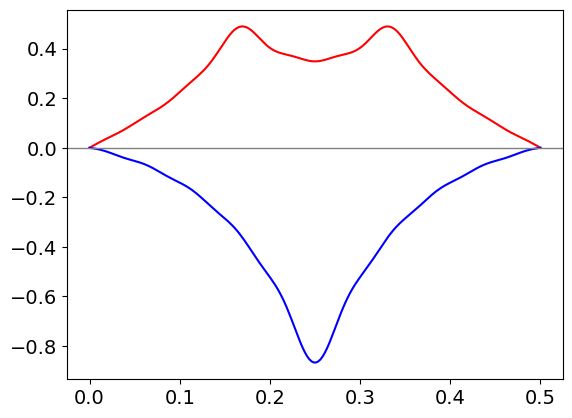

In [2]:
# calculation of wave profile. You can 'prettyfy' the plot as needed.
# quad(...) is the numerical integrator

f  = lambda x: np.exp(-abs(2*x-L)*5) - np.exp(-L*5)  # initial function of plucked string

f01= lambda x,n : f(x)*np.sin(n*np.pi*x/L)   
b  = lambda n : (2/L)*quad( f01,0,L,args=n )[0]      #[0] means get just answer not error as well

u  = lambda x,t, maxn : sum( [  b(n)*np.cos(n*np.pi*c*t/L)*np.sin(n*np.pi*x/L) for n in range(1,nmax) ] )

L  =   0.5                     # string length
c  =   100.0                   # wave speed
T  =   2.0*L/c                 # period
nmax = 20                      # sum to 20 terms
x = np.linspace(0,L,200)       # define x values to do calculation over.
t = T/12                       # choose time to plot curve
plt.plot( x, u(x,t,nmax),color='red' )
t = T/2
plt.plot( x, u(x,t,nmax),color='blue' )
plt.axhline(0,color='grey', linewidth=1)
plt.show()

The figure shows the profile of the string at different times with twenty terms added in the series; ($\mathtt{nmax = 20}$). The displacement is clearly greatly exaggerated compared to the true value. It is clear that the wave is composed of waves moving in opposite directions as can be seen by the way that the peaks of the wave move with time in fig 30.

In the case when the initial velocity is not zero but the displacement is zero, the initial conditions will be

$$\displaystyle  u(x, 0) = 0,\quad \frac{\partial u(x, t)}{\partial t} = f (x)$$

Notice that the initial velocity is a function of position; i.e. this describes the initial velocity at each point along the wire. As the velocity is not zero, the sine term containing time in the general equation (63) is now used, as its derivative is a cosine which is not zero at $t = 0$. The general term is found by differentiating the general solution giving

$$\displaystyle \frac{\partial u}{\partial t}=\frac{n\pi c}{L}\sin\left( \frac{n\pi ct}{L}\right)\sin\left(\frac{n\pi x}{L} \right)=f(x)$$

The coefficients are now 

$$\displaystyle b_n=\frac{2}{L}\frac{L}{n\pi c}\int_0^L f(x)\sin\left( \frac{n\pi x}{L} \right)dx$$

and the general solution is 

$$\displaystyle  u =\sum_{n=1}^\infty b_n\sin\left( \frac{n\pi ct}{L}\right)\sin\left(\frac{n\pi x}{L} \right) \qquad\tag{64}$$

As the initial displacement is zero, but the velocity is not zero, plotting the displacement with time shows that it initially increases; which is the opposite behaviour to that observed in Fig. 30.

If both the displacement and velocity are some function of $x$, then both the sine and cosine terms containing time appear in the general solution.

## 18 The Fourier Transform method

Fourier transforming a differential equation, such as the Schroedinger or diffusion equations often leads to a simpler equation in transformed space and one that can be solved easily. To get at the complete solution this equation has to be transformed back into 'real space' and even though this is now only involves an integral this can sometimes be tricky. If an analytic solution is not possible a numerical transform can be used.

The fourier transforms are described in detail in chapter 9, section 5 and are defined as 

$$\displaystyle  g(k) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty f(x)e^{-ikx}dx \quad\text{or}\quad F(f(x))=g(k)\quad\text{ forward transform}   \tag{9-23a}$$

$$\displaystyle  f(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty g(k)e^{+ikx}dk \quad\text{or}\quad F^{-1}(g(k))=f(x)\quad\text{ reverse transform}\tag{9-23b}$$

There are some particular transforms that are very useful in this context and these are of a product $xy\equiv xf(x)$ and the derivative $F(df(x)/dt)$. These are  derived in chapter 9, Fourier Transforms section 6.8. The transform of a derivative is found by integrating by parts using $\int udv=uv-\int vdu$ where $u=e^{-ikx}$ and $dv=df/dx$. This gives

$$\displaystyle  F\left(\frac{d}{dx}f(x)\right) = \int_{-\infty}^{\infty}f(x) e^{-ixk}dk = ik\,g(k)$$

and by the same method for the second derivative

$$\displaystyle  F\left(\frac{d^2}{dx^2}f(x)\right)  = (ik)^2\,g(k)  \tag{9-23c}$$

The transform of the product 

$$\displaystyle F\left(xf(x)\right) =\int_{-\infty}^{\infty} xf(x)e^{-ikx}dx $$

is evaluated by noticing $-ike^{-ikx}$ is a derivative which gives

$$\displaystyle \int_{-\infty}^{\infty} xf(x)e^{-ikx}dx=\int_{-\infty}^{\infty} f(x)\frac{d}{dk}\left(ie^{-ikx}\right) dx =i\frac{d}{dk}\int_{-\infty}^{\infty} f(x)e^{-ikx} dx=i\frac{d}{dk}g(k)\tag{9-23d}$$

The time derivative only affects $f(x,t)$ hence, 

$$\displaystyle \frac{\partial }{\partial t}f(x,t)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty \frac{\partial }{\partial t}f(k,t)e^{ikx}dk \tag{9-23e}$$

## 18.1 The Airy / Stokes equation

The equation

$$\displaystyle \frac{d^2y}{dx^2}=xy  \tag{65}$$

is called the Airy and/or the Stokes equation and is different to the Airy function describing Fraunhofer diffraction. The equation can be made into the Schroedinger equation for a particle in a gravitational field or one of linear force such as in an electric potential.

Starting with eqn 65, let $f(x)\equiv y$ and taking the fourier transform of each side and using the derivative and product formulas above gives

$$\displaystyle -k^2g(k)= i\frac{d}{dk}g(k)$$

where $g(k)$ is the transform. Integrating this gives as a first order equation gives

$$\displaystyle g(k)=g(0)e^{ik^3/3}$$

where $g(0)$ represents the initial conditions. This equation is in $k$ space but we shall want it in real space, i.e. in terms of $x$. To do this we will assume that $g(0)$ is a constant then transforming back to $x$ gives

$$\displaystyle y(x)\equiv F^{-1}(g(k))=\frac{c}{\sqrt{2\pi}}\int_{-\infty}^\infty e^{ik^3/3}e^{+ikx}dk $$

As $e^{i\theta}= \cos(\theta)+i\sin(\theta)$ and using even/odd symmetry removes the sine term and produces

$$\displaystyle y(x)=\frac{2c}{\sqrt{2\pi}}\int_0^\infty \cos(k^3/3+kx)\,dk$$

This now has to be integrated at each $x$ and the result has the form of a standing wave and then an exponential decay, see figure 30a. The integration is numerically difficult because $k^3$ becomes very large and the function is oscillatory about zero. The integral with $c=1$ is called an _Airy function of the first kind_ $Ai(x)$ and is usually included as a special function in most computer languages. This is the solution when $y\to 0$ when $x\to\infty$, and there is a second Airy function solution to this equation in the limit that $y\to\infty$ (called $Bi(x)$) but we shall not be interested in this case.

## 18.2 The Schroedinger equation for a particle in a gravitational potential: $V(x)\sim x$ 

THe Schroedinger equation with potential $V(x)$ is 

$$\displaystyle -\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+V(x)\psi = E\psi$$

and when the potential is linear, such as in a gravitational field, then

$$\displaystyle -\frac{d^2\psi}{dx^2}+\frac{2m}{\hbar^2}(mgx-E)\psi=0 \tag{66}$$

where  $m$ is mass and $g$ the force due to gravity. With a linear potential this equation can be changed into a form equivalent to eqn. 65. The boundary conditions or limits on the wavefunction are defined as $\psi(0)=0$ and $\psi(\infty)\to 0$ . This means that only positive values of $x$ are possible, the potential is shown in figure 30a and is infinitely high at $x=0$ so the wavefunction cannot penetrate this side of the barrier. The equation does not yet have the form of eqn. 65 and the most difficult part of the calculation is changing it into this form.

We start by looking at the units of the constants 

$$\displaystyle \frac{2m^2g}{\hbar^2}\equiv \mathrm{\frac{kg^2ms^{-2}}{kg^2m^4s^{-4}s^2}  }=\frac{1}{m^3}$$

and so define a characteristic length $l$ as 

$$\displaystyle l=\left(\frac{\hbar^2}{2m^2g}\right)^{1/3}$$

The distance becomes dimensionless by defining a new variable  $\chi=x/l$.

The energy can be made dimensionless also by the calculation 

$$\displaystyle E_0=\left(\frac{\hbar mg^2}{2}\right)^{1/3}$$

$\hbar mg^2$ has dimensions of energy cubed and we define $\epsilon=E/E_0$ where $\epsilon$ is dimensionless or reduced energy. With these new values and defining 

$$\displaystyle \xi = \chi-\epsilon$$

we can change the equation into a dimensionless form and one similar to eqn. 65 

$$\displaystyle \frac{d^2\psi}{d\xi^2}-\xi\psi =0 $$

with solutions that are the Airy function $\psi(\xi)=Ai(\xi)$. The limits are $\psi(-\epsilon)=0, \psi(\infty)\to 0$ so classical motion is permitted only between turning points $\xi=-\epsilon$ and $\xi=0$ or $x=0$ and $\epsilon$. 

When the wavefunction $Ai(x)=0$ at $x=0$ there must be a solution giving a discrete energy, and so a valid solution to the Schroedinger equation, because the wavefunction has to be zero at the boundary $x=0$. The Airy function is oscillatory and the zero crossings lead to energy levels with quantum numbers $n=1,2, \cdots$. When $\displaystyle Ai\left(-\epsilon_n\right)=0$ (i.e. at $x=0$) the energy for the $n^{th}$ level is $E_n=E_0\epsilon_n$ where $\epsilon_n$ is the value that makes $Ai=0$.

The values where the Airy function is zero are tabulated, the first few are for $Ai(-\epsilon_n)=0$ when $\epsilon_n=2.3381,  4.08795,  5.5206,  6.7867,  7.9441$. The characteristic length for an electron is $l=8.801\cdot 10^{-4}$ m in Earth's gravitational field and its characteristic energy $E_0=1.6654\cdot 10^{-21}$ J which, for comparison, is a little smaller that thermal energy at room temperature $4.14 \cdot 10^{-21}$ J.

![Drawing](diffeqn-fig30a.png)

Figure 30a. The wavefunctions, the Airy function $Ei(\xi)$, and energy levels for a particle in a linear potential. The plots show the data which is not scaled by $l$ or $E_0$ in the way described in the text and both have a value of $1$. The diagonal line shows the potential and the tunnelling to the right of this is clear. The quantum numbers are also shown. (The amplitudes of the wavefunctions are arbitrary and adjusted to fit the figure.)
__________
The shape of the wavefunctions is reminiscent of those for the harmonic oscillator but more like the anharmonic Morse potential being skewed at larger $x$ because of the shape of the potential allowing tunnelling. The lowest level wavefunction has zero nodes, then $1,2\cdots$ nodes as the energy increases. Tunnelling is apparent into the non-classical region at large $x$ but not at $x=0$ because here the potential is infinitely high. The gap between the energy levels decreases with increase in energy just as in the Morse potential and unlike the harmonic oscilator. (The symmetry in the HO prevents this from happening).

The wavefunction shown in figure 30a, are the stationary state ones, they give only the probability of finding the particle at height $x$ above ground level when in a given energy level. There is no motion in this. To see that the particle can 'bounce' two or more of these eigenstates must be excited at the same time. The time dependence of a wavefunction is obtained by multiplying by $e^{-iE_nt}$ for energy $E_n$ to make the wavefunction $\psi_{x,n,t}=\psi_{x,n}e^{-iE_nt}$. The probability of being at  position $x$ is the product $\psi^*_{x,n}\psi_{x,n}$ where * indicates the complex conjugate and so all time disappears. If, however, a superposition is made, i.e. a wavepacket with wavefunctions having different quantum numbers, then this will have a time dependence. The simplest case is to add two wavefunctions together, e.g.

$$\displaystyle S = \frac{1}{\sqrt{2}}(\psi_{x,n}e^{-iE_nt}+\psi_{x,m}e^{-iE_mt}),\quad n,m =1,2\cdots; n \ne m$$

and then the probability at any time is 

$$\begin{align}W&= ((\psi_{x,n}e^{+iE_nt}+\psi_{x,m}e^{+iE_mt}))(\psi_{x,n}e^{-iE_nt}+\psi_{x,m}e^{-iE_mt})/2\\&= (\psi_{x,n}^2+\psi_{x,m}^2+\psi_{x,n}\psi_{x,m}(e^{i(E_m-E_n)t}+e^{-i(E_m-E_n)t} ))/2\end{align}$$

which has a constant term plus a variable one that looks very similar to a cosine in $(E_m-E_n)t$. The time dependence causes the wavepacket to move in the potential, and do so repeatedly with a period $2\pi/(|E_n-E_m|)$. This is shown in figure 30b for the sum of wavefunctions $n=5,m=6$ and for fractions of the period, $0,0.2,\dots$ as shown in each panel. The reinforcing and destructive interference are clear. With lower quantum numbers the extension is smaller and the period longer because the energy gaps are greater. Adding several levels together leads to lots of different periods with recursions at different times due to different combinations of $E_n,E_m,E_p,E_q$ etc. produced.

![Drawing](diffeqn-fig30b.png)

Figure 30b. Wavepackets for the quantum numbers ($5,6$) at fractions of a period.
______

To imagine the particle 'bouncing' the average distance can be computed. Again the wavepacket is needed, if just one wavefunction is used then a constant value is obtained for the average position as all time is removed via the complex conjugate.

The average position is by definition

$$\displaystyle \langle x\rangle =\int_0^\infty x\psi_{x,n}e^{iE_n t}\psi_{x,m}e^{-iE_mt}dx$$

and the result at several times is shown in figure 30c. The sinusoidal motion is clear. The period of the wavepacket is maintained and the particle oscillates only between finite values and does not reach zero.

![Drawing](diffeqn-fig30c.png)

Figure 30c. Average motion of the wavepacket in figure 30b made with quantum numbers shown ($5,6$) vs time. The period is shown between vertical lines is the same as the wavepacket period.
_______

## 18.3 Time dependent Schroedinger equation for a 2D square well

A particle is trapped in a 2D square well of infinite depth. The boundary conditions are $\psi(x)=0$ at $x=0,L,y=0,L$ and the potential in the well is zero.  The time dependent Schroedinger equation is

$$\displaystyle -\frac{\hbar^2}{2m}\left(\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2} \right)\psi(x,y,t)=i\hbar\frac{\partial}{\partial t}\psi(x,y,t)  \tag{67}$$

which can be recast as

$$\displaystyle -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial \vec z^2}\psi(\vec z,t)=i\hbar\frac{\partial}{\partial t}\psi(\vec z,t) $$

by making $z$ a vector of $x$ and $y$. Taking the fourier transform of both sides using eqn's 23d and 23e gives,

$$\displaystyle -\frac{\hbar^2}{2m}k^2g(k,t)=-\hbar \frac{\partial }{\partial t}g(k,t)$$

where $g(k,t)$ is used to describe the transformed wavefunction and $k^2=k_x^2+k_y^2$. This equation is now a first order one and can be integrated to give

$$\displaystyle g(k,t)=g(k,0)e^{-i\hbar k^2t/2m} \tag{68}$$

A wave of frequency $\omega\; (=2\pi\nu)$ is described by $e^{-i\omega t}$ and as, by definition, $E=\hbar\omega$ then the energy levels are

$$\displaystyle E_k=\frac{\hbar^2k^2}{2m}$$

which is in transformed or '$k$ space'. The fourier transform uses the conjugate pairs ($x,k_x$), and ($y,k_y$) where $k_{x,y}=2\pi/\lambda_{x,y}$ which are the wavenumbers in each direction. The box length is $L$ and the lowest energy has a wavefunction with wavelength $\lambda = 2L$ in other words the box is half a wavelength long in both $x$ and $y$. This wavelength is determined by the initial conditions which is that the wavefunction must be zero at the edges of the box which is only true at integer multiples of $L/2$, thus the wavelength of all the  wavefunctions are 

$$\displaystyle \frac{\lambda}{2}= \frac{L}{1}, \frac{L}{2}, \frac{L}{3}\cdots \frac{L}{n}, n=1,2,3\cdots$$

where $n$ is the quantum number. This true for both $x$ and $y$ so there are two quantum numbers that take values independently from $1 $ upwards.

Substituting for $k_x=2\pi/\lambda = n\pi/L$ and similarly for $k_y$ gives  $k^2=k_x^2+k_y^2=\pi^2(n^2+m^2)/L^2$ the energy levels are 

$$\displaystyle  E_{n,m}=\frac{\pi^2\hbar^2}{2mL^2}(n^2+m^2)$$

which means that the energy levels are doubly degenerate but only as a consequence of the box being square.

To satisfy the time independent Schroedinger equation the wavefunctions are 

$$\displaystyle \psi(x,y,0)=N\sin(n\pi x/L)\sin(m\pi y/L)$$

where $N$ is normalisation term $\displaystyle N^2\int \int \psi^*\psi dxdy = 1$. 


## 18.4 The 1D Diffusion equation

The diffusion of a large number of similar molecules in solution at concentration $c$ at time $t$ and position $x$ is given by Fick's second law. In one dimension this is

$$\displaystyle \frac{\partial c}{\partial t}=D\frac{\partial^2 c}{\partial x^2} \tag{69}$$

where $D$ is the diffusion coefficient. In aqueous solution this is typically $10^{-9}\,\mathrm{m^2\,s^{-1}}$ for a small molecule and about a hundred times smaller for a protein. The same form of equation applies to heat transfer where $D$ is replaced by thermal conductivity. The method used here is similar to that used above. 

We shall assume that the 1D solution is of infinite extent and that molecules are piled up in a very narrow region, i.e as a $\delta$ function at $x=0$. Once the solution is found we can use convolution to find the solution for different initial profiles of molecules or temperature.

The transform in $x$ is formally

$$\displaystyle F\left(\frac{\partial c}{\partial t}\right)=F\left(\frac{\partial^2 c}{\partial x^2}\right)$$

then using eqns. 23c-d and eqn. 69 and letting $g$ represent the transform gives

$$\displaystyle \frac{\partial }{\partial t}g(k,t)=-Dk^2 g(k,t)$$

and integrating this produces

$$\displaystyle g(k,t)=g(k,0)e^{-Dk^2t} \tag{70}$$

where the initial condition $g(k,0)$ is in transform space. 

### **(i) Initial amount is a $\delta$ function at $x=0$**

In 'real' space let the initial amount be $f(x,0)$ with fourier transform

$$g(k,0)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty f(x,0)e^{-ikx}dx $$

but because we shall define $f(x,0)=\delta(x)$ the delta function picks out just one value at $x=0$ as its value is unity only at $x$, giving $\displaystyle g(k,0)=\frac{1}{\sqrt{2\pi}}$.

Transforming back into 'real' space gives

$$\displaystyle c(x,t)=\frac{1}{2\pi}\int_{-\infty}^\infty e^{-Dk^2t}e^{ikx}dk=\frac{1}{\sqrt{4\pi Dt}}e^{-x^2/(4Dt)}$$

where the integral is evaluated by completing the square, otherwise Sympy can be used. As can be seen this solution is only correct for $t>0$. This equation produces a gaussian concentration profile because the fourier transform of a Gaussian is also a Gaussian. This equation essentially forms a kernel from which the effect of diffusion on other initial distributions can be based.

Calculating the profiles shows that the concentration spreads out across space and in time as shown in the figure. From the values you can see that diffusion is a relatively slow process, but with a rapid initial phase. In 1D the root mean squared distance diffused in time $t$ is $\sqrt{2Dt}$.

![Drawing](diffeqn-fig30d.png)

Figure 30d. Diffusion from the delta function initial distribution is represented by the vertical line at zero. The diffusion constant used was $10\cdot 10^{-6}\,\mathrm{cm^2\,s^{-1}}$. The left panel shows the concentration profile vs. position at the times shown and the right panel the concentration at various positions vs. time.
______

### **(ii) Initial concentration not at $x=0$**

If the function is to be situated at a different place other than zero this can most easily be done by using the shift property of fourier transforms.

$$\displaystyle F(f(x- x_0)) = \int_{-\infty}^{\infty} f(x- x_0)e^{-ik x}dx = \int_{-\infty}^{\infty} f(s)e^{-ik(s+ x_0)}ds = e^{-ik x_0} g(k)$$

Thus to shift the centre of the concentration profile $c(x,t)$ by a distance $x_0$ the transform becomes

$$g(k,0)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty f(x,0)e^{-ikx}e^{-ikx_0}dx $$

which in the case of delta function initial condition results in a Gaussian where $x\to x-x_0$ or

$$\displaystyle c(x,t)=\frac{1}{\sqrt{4\pi Dt}}e^{-(x-x_0)^2/(4Dt)}$$

As might be expected in some cases the transform cannot be easily reversed by integration and a numerical transform (FFT) is the only recourse.

In a case that a function other than the delta function is needed then the result assuming a delta function, the kernel, can be convoluted with the new function. 


When the initial condition is not a delta function we have to reverse transform eqn. 70 to bring us back to 'real space', i.e. $x$ and the equation to do this is 

$$\displaystyle c(x,t)= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty \left[\int_{-\infty}^\infty f(y,0)e^{-iky}dy\right]e^{-Dk^2t} e^{ikx} dk$$

where $y$ a dummy variable for the integration and $f(y,0)$ the initial condition. Rearranging gives

$$\displaystyle c(x,t)= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty \left[\int_{-\infty}^\infty e^{ik(x-y)-Dk^2t}dk\right] f(y,0)dy$$

### **(iii) Comb of top-hat functions**

In the case of a 'top-hat' function, i.e one that is constant between $x=a \to b$ and zero elsewhere or many polynomials between two values, the integrations can be performed analytically but for other cases a numerical method will have to used. The outer integral limits are $y=\pm\infty$ but usually the integral is split into parts, e.g $\displaystyle \int_{-\infty}^\infty [\cdots] -\int_{-\infty}^a [\cdots]- \int_b^\infty [\cdots]$  which can be simplified to $\displaystyle \int_a^b[\cdots]$. As an example the result of heating a series of strips is shown in figure 30e. The equation for a single strip is of amplitude $1$ is 

$$\displaystyle c(x,t)= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty \left[\int_{-\infty}^\infty e^{ik(x-y)-Dk^2t}dk\right] dy=\int_a^b\frac{1}{\sqrt{4\pi Dt}}e^{-(x-x_0)^2/(4Dt)}dy$$

which has the solution ($a < b$) 

$$\displaystyle c(x,t)=  \frac{1}{2}\mathrm{erf}{\left(\frac{b - x}{2 \sqrt{Dt}} \right)} - \frac{1}{2}\mathrm{erf}{\left(\frac{a - x}{2 \sqrt{Dt}} \right)} $$

and other strips are positioned by changing $a,b$. The initial top-hat population is coloured grey. An rapid initial fall in population is clear which then slows is accord with the square root of time for the root mean square distance diffused, $\langle x\rangle =\sqrt{2Dt}$ in one dimension. 

![Drawing](diffeqn-fig30e.png)

Figure 30e. Population as an initial comb of top-hat regions (grey) and the effect of diffusion at the times shown assuming a diffusion coefficient of $D=10\cdot 10^{-6}\, \mathrm{cm^2\,s^{-1}}$. The horizontal axis is in $\mu m$.
_______

## 18.5 Transient Grating Experiments

A comb of excited states can be made by crossing two laser beams from the same source. If a pump laser is split into two equal parts and recombined in a solution containing chromophores a set of fringes of the excited state molecules, sometimes called a population density grating (figure 30f), will be produced. If the solvent only is used a refractive index grating can be produced and probed in a similar way. The transient grating can diffract a probe laser. 

Excited molecules decay away by non-radiative processes and by fluorescence and these will eventually destroy the transient grating. Additionally lateral and rotational diffusion or energy transfer smears out the fringes, thus providing a way of measuring these properties *via* the decrease in diffracted intensity of a probe laser. Similarly thermal gratings can be produced and probed. 

The weak probe laser can be at the same or a different wavelength to the pump and is aligned to be diffracted into a different spatial position to the pump so is easily identified against a dark background. The technique varies a little depending upon what is measured but usually short pulse lasers are used, picosecond or femtosecond and in this case it is clearly essential that they arrive in the sample at the same time. As an example, if polarised light is used those molecules whose transition dipole is aligned with the polarisation of the pump (with a $\cos^2(\theta)$ probability ) are preferentially excited. Subsequent rotational diffusion of the excited molecules can be measured because as the molecules rotate the polarised grating is diminished as the initially aligned transition moments are randomised and therefore the probe pulse has fewer molecule aligned with its polarisation to interact with. By measuring at different delay times, wrt. the pump laser, the probe pulse can map out the rotational diffusion in a pump-and-probe manner.

The spatial period of the grating is given by $\Lambda =2\pi/|q|$ (figure 30f) where $\vec k_B+\vec q=\vec k_A$ and $\vec k_{A,B}$ are the wavevectors of the pump beam of wavelength $\lambda_p$. From the diagram on the right of fig 30f $|q|$ can be calculated, using right angled triangles, in terms of the angle $\theta$ and knowing that a wavevector is defined as $k=2\pi/\lambda$, 

$$\displaystyle \Lambda =\frac{\lambda_p}{2\sin(\theta/2)}$$

The grating has a period of only a few microns for visible pump light. The combined laser beams have electric field amplitude in the interference region

$$\displaystyle E=E_Ae^{+ikx}+E_Be^{-ikx}$$

and the population of excited states in the grating is proportional to the intensity $I=E^*E$ or

$$\displaystyle I= E_A^2+E_B^2+E_AE_B(e^{2ikx}+e^{-2ikx})=E_A^2+E_B^2+2E_AE_B\cos(2kx)$$

which means that the modulation is governed by $E_AE_B$ the product of the pump field strength. The diffracted light from the probe is in turn proportional the excited state population. The cosine describes the grating variation with $x$ which is the direction across the grating as shown in fig 30f and as the grating decays away, by whatever means, such as diffusion or excited state decay, the diffracted signal similarly decreases. The numerical solution of the pertinent equations is described in Chapter 11-4.11.

![Drawing](diffeqn-fig30f.png)

Figure 30f. Left. Set up for transient grating experiment showing a first order of the diffracted probe. Right. Wavevectors from the pump beam, where $\vec k_A=\vec k_B +\vec q$

## 18.6 2D Diffusion

The 2D diffusion equation has the form 

$$\displaystyle \frac{\partial c}{\partial t}=D\left(\frac{\partial^2 c}{\partial x^2}+\frac{\partial^2 c}{\partial y^2}\right) $$

which has the same form as that for 1D diffusion but with the extra term in $y$. There is no term in the product $xy$ so this is in effect rather like two separate equations. If the fourier transforms are taken as above in terms of $x$ and $y$ and necessarily using $k_x$ and $k_y$ instead of just $k$ the result is just the product of two 1D terms. Following the method above the transform equation is 

$$\displaystyle \frac{\partial }{\partial t}g(k_x,k_y,t)=-D(k_x^2+k_y^2) g(k_x,k_y,t)$$

and transforming to $x,y$ from $k_x,k_y$ gives

$$\displaystyle c(x,y,t)=\frac{1}{2\pi}\int_{-\infty}^\infty e^{-Dk_x^2t}e^{ik_xx}dk_x\int_{-\infty}^\infty e^{-Dk_y^2t}e^{ik_yx}dk_y=\frac{1}{4\pi Dt}e^{-(x^2+y^2)/(4Dt)}$$

where the integral $\int\int e^{-D(k_x^2+k_y^2)t}e^{i(k_xx+k_yy)} dk_xdk_y $ is split into two because, as mentioned, there is no term in $xy$. The $x^2+y^2$ in the exponential means that $x$ and $y$ are interchangeable, or put another way that diffusion is the same in the $x$ and $y$ directions, i.e. is spherically symmetrical and we can consider that $x^2+y^2=r^2$ where $r$ is the radius of the diffusing material, this with a delta function placed at $x=y=0$ shows that the concentration spreads out spherically while its peak height reduces. This, naturally, has the be the case because the amount of material is constant.  The effect is shown in figure 30g. Finally note that the solution to Fick's law, in any dimension, cannot apply at $t=0$, as the concentration would have to become infinite.  The short time behaviour is completely missing and more sophisticated models, are needed here. 

![Drawing](diffeqn-fig30g.png)

Fig. 30g. Diffusion in $2$ dimensions, with an initial amount at $x=y=0$ showing how the concentration spreads out spatially and in time. The line shows the time evolution of the peak concentration, where $x=y=0$ and which has the form $\displaystyle \frac{1}{4\pi Dt}$. The radial distance $r$ is measured in the plane from the centre of the circle outwards at any angle $\theta = 0\to 2\pi$ around the circular base.
_____________________________

We can see that the mean or average or mean value of the concentration distribution will be zero, since this is radially symmetrical. First we should check that the concentration profile over all coordinates is normalised to unity, since we used a delta function as the boundary condition when solving the equations. The integral is taken over all coordinates and is,

$$\displaystyle \frac{1}{4\pi Dt}\int_{-\infty}^\infty\int_{-\infty}^\infty e^{-(x^2+y^2)/4Dt}dxdy$$

This can be tackled in two ways, either by retaining Cartesian $x,y$ or by changing to plane polar coordinates, (see chapter 1, section 5.7) in which case the area element  $dxdy\to r\,dr\,d\theta$ and $x^2+y^2 \to r^2$ and the limits are changed from $\pm \infty$ in $x,y$ to $0\to \infty$ in $r$ and $0\to 2\pi$ in $\theta$. The integral becomes

$$\displaystyle \frac{1}{4\pi Dt}\int_0^{2\pi}\int_0^{\infty} e^{-r^2/4Dt}rdrd\theta=\frac{2\pi}{4\pi Dt}\int_0^\infty e^{-r^2/4Dt}rdr=1$$

which can be confirmed using Sympy.

In [3]:
r,D,t = symbols('r,D,t', positive = True)
f01 = r*exp(-r**2/( 4*D*t ) )/( 2*D*t )
ans = integrate(f01,(r,0,oo))
print('normalisation =',ans)

normalisation = 1


The average or first moment of $x$ is therefore 

$$\displaystyle \langle x\rangle =\frac{1}{4\pi Dt}\int_{-\infty}^\infty\int_{-\infty}^\infty xe^{-(x^2+y^2)/4Dt}dxdy=0$$

and as this is an odd function and the integration limits are symmetrical we know that this integral is zero. Similarly for $\langle x\rangle$. The second moment is the root mean square of the particles displacement $\langle r^2\rangle$, and it is easier to use plane polar coordinates (see chapter 1, section 5.7) thus

$$\displaystyle \langle x^2\rangle =\frac{1}{4\pi Dt}\int_{0}^{2\pi}\int_{0}^\infty r^2re^{-r^2/4Dt}drd\theta=4Dt$$

thus the mean distance diffused by the whole group of particles in two dimensions in time $t$ is $\sqrt{4Dt}$. Any individual particle moves under Brownian motion and this individual motion is not bound by Fick's law, only the average behaviour.

In [4]:
f02 = r**3*exp(-r**2/( 4*D*t ) )/( 2*D*t )
ans = integrate(f02,(r,0,oo))
print('<r^2> =', ans)

<r^2> = 4*D*t
